
The dataset contains prices of houses(MEDV) in Boston City(USA) based on various parameters.
We have to predict the house prices based on the variables provided in the dataset. 

1. Plot different scatter plots of all feature variables with MEDV. Observe trends based on the plots. Which features are more likely to give a precise value for MEDV?

2. Perform a 80:20 split with the train_test_split function. Perform linear regression on the training dataset. Print the obtained co-efficients for every feature. Which features have more weightage? 

2. Obtain the MSE, R^2 score of this model. 

### With the original dataset, i.e with all the features, perform the above steps again. Which model gives you a better accuracy?

##Data description

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

**crim**
per capita crime rate by town.

**zn**
proportion of residential land zoned for lots over 25,000 sq.ft.

**indus**
proportion of non-retail business acres per town.

**chas**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

**nox**
nitrogen oxides concentration (parts per 10 million).

**rm**
average number of rooms per dwelling.

**age**
proportion of owner-occupied units built prior to 1940.

**dis**
weighted mean of distances to five Boston employment centres.

**rad**
index of accessibility to radial highways.

**tax**
full-value property-tax rate per \$10,000.

**ptratio**
pupil-teacher ratio by town.

**black**
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

**lstat**
lower status of the population (percent).

**medv**
median value of owner-occupied homes in \$1000s.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#read csv
cols = ['CRIM', "ZN", "INDUS", "CHAS", "NOX", "RM" , "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df = pd.read_csv('/content/drive/MyDrive/Assignment/Datasets/housing.csv', names=cols, header=None)
#df.head(100)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split
X = df[['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE', 'DIS',	'RAD', 'TAX',	'PTRATIO', 'B',	'LSTAT']]
Y = df[['MEDV']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [ ]:
np.any(np.isnan(X_train))

False

Nan values found below.

In [ ]:
np.any(np.isnan(y_train))

True

In [ ]:
np.any(np.isnan(X_test))

False

In [ ]:
np.any(np.isnan(y_test))

True

In [ ]:
np.all(np.isfinite(X_train))

True

In [ ]:
np.all(np.isfinite(y_train))

False

In [ ]:
np.all(np.isfinite(X_test))

True

In [ ]:
np.all(np.isfinite(y_test))

False

Filling NaN with zero.

In [ ]:
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

In [ ]:
np.any(np.isnan(y_train))

False

Now, I am plotting graphs of each feature with whole data including training and test data. Then I apply linear regresion to each feature with MEDV. We can see that all the R2-scores are negative, showing that the data is non-linear.

Later I have implemented multi-linear regression for a few sets.

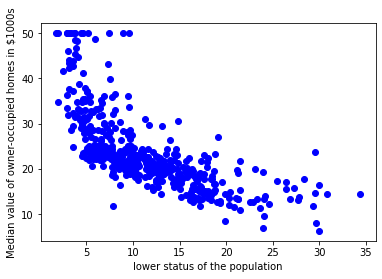

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.LSTAT, df.MEDV, color = 'blue')
plt.xlabel("lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[-0.95742659]]
Intercept:  [32.29879117]


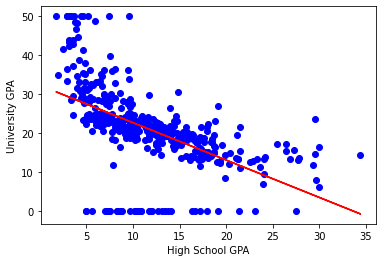

Mean absolute error: 6.50
Residual Sum of Squares: 88.516234
R2-score: -1.46


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['LSTAT']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['LSTAT']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

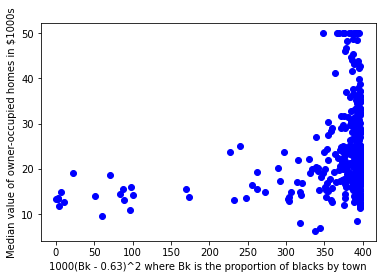

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.B, df.MEDV, color = 'blue')
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[0.05816475]]
Intercept:  [1.71427711]


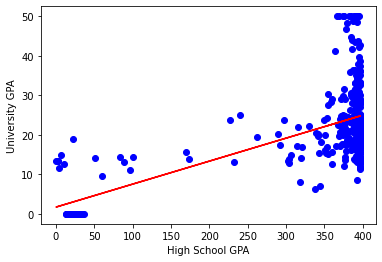

Mean absolute error: 5.97
Residual Sum of Squares: 67.480580
R2-score: -0.18


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['B']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['B']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

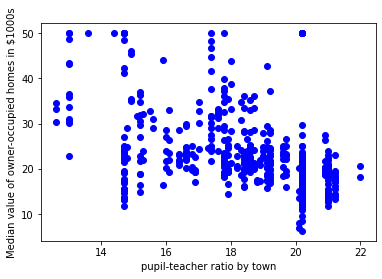

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.PTRATIO, df.MEDV, color = 'blue')
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[-0.06879968]]
Intercept:  [24.02392026]


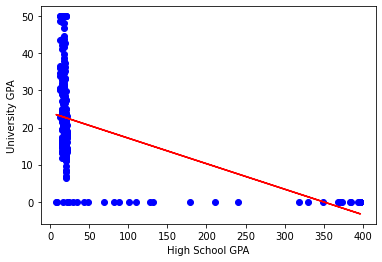

Mean absolute error: 6.76
Residual Sum of Squares: 90.221620
R2-score: -1.00


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['PTRATIO']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['PTRATIO']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

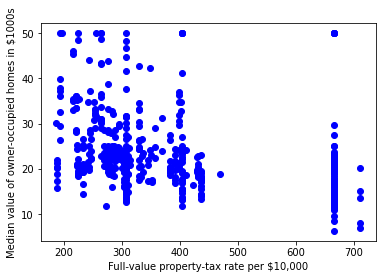

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.TAX, df.MEDV, color = 'blue')
plt.xlabel("Full-value property-tax rate per $10,000")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[0.00979919]]
Intercept:  [17.83063784]


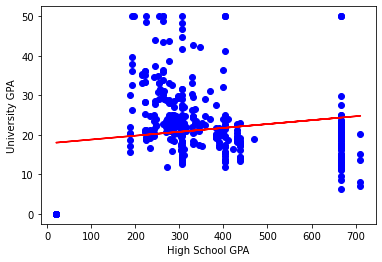

Mean absolute error: 8.47
Residual Sum of Squares: 123.497028
R2-score: -38.86


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['TAX']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['TAX']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

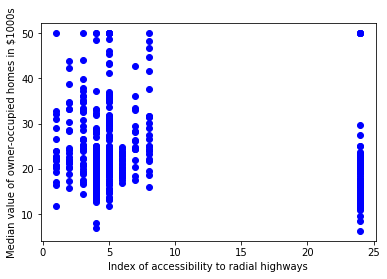

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.RAD, df.MEDV, color = 'blue')
plt.xlabel("Index of accessibility to radial highways")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[-0.03613538]]
Intercept:  [23.88883095]


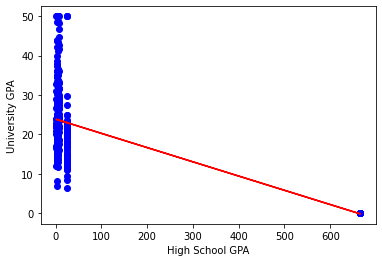

Mean absolute error: 5.76
Residual Sum of Squares: 67.826161
R2-score: -0.08


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['RAD']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['RAD']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

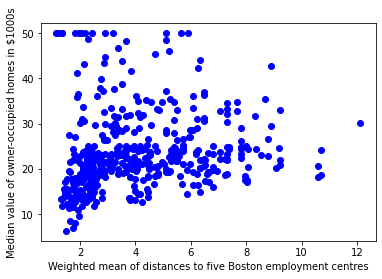

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.DIS, df.MEDV, color = 'blue')
plt.xlabel("Weighted mean of distances to five Boston employment centres")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[-1.00025063]]
Intercept:  [27.24056586]


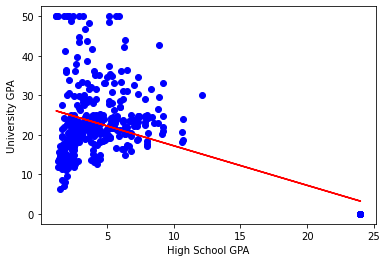

Mean absolute error: 6.57
Residual Sum of Squares: 76.672291
R2-score: -0.63


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['DIS']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['DIS']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

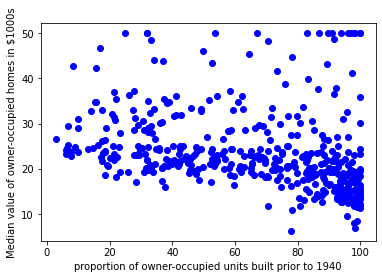

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.AGE, df.MEDV, color = 'blue')
plt.xlabel("proportion of owner-occupied units built prior to 1940")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[0.06610149]]
Intercept:  [17.25470244]


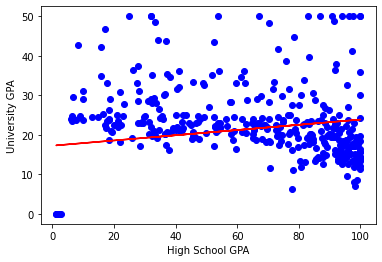

Mean absolute error: 8.81
Residual Sum of Squares: 125.302271
R2-score: -24.22


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['AGE']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['AGE']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

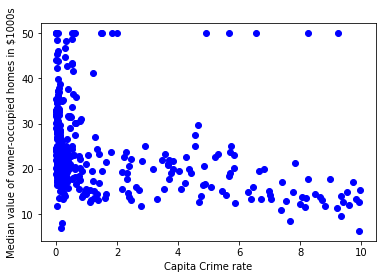

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.CRIM, df.MEDV, color = 'blue')
plt.xlabel("Capita Crime rate")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[-0.48847377]]
Intercept:  [21.81302824]


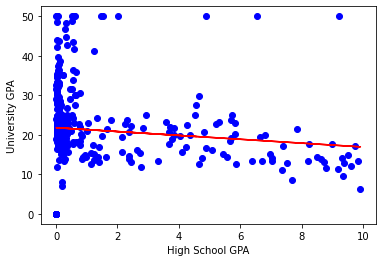

Mean absolute error: 8.12
Residual Sum of Squares: 134.866804
R2-score: -95.96


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['CRIM']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['CRIM']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

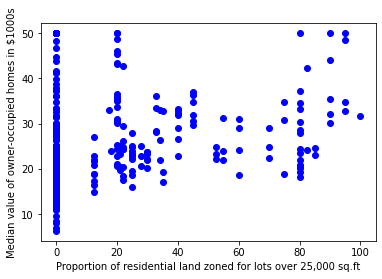

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.ZN, df.MEDV, color = 'blue')
plt.xlabel("Proportion of residential land zoned for lots over 25,000 sq.ft")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[0.0977018]]
Intercept:  [19.92069395]


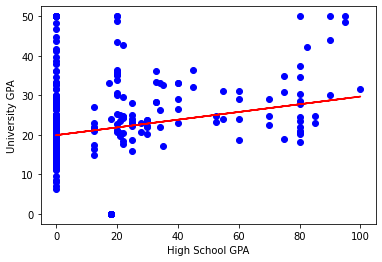

Mean absolute error: 7.99
Residual Sum of Squares: 129.259143
R2-score: -22.05


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['ZN']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['ZN']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

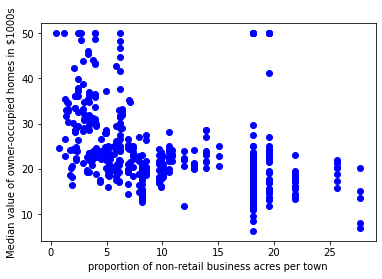

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.INDUS, df.MEDV, color = 'blue')
plt.xlabel("proportion of non-retail business acres per town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[-0.0181746]]
Intercept:  [21.3608371]


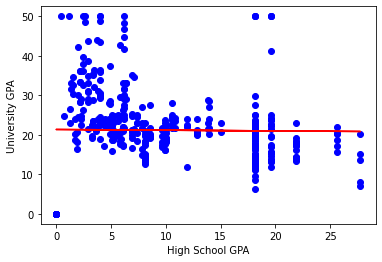

Mean absolute error: 8.39
Residual Sum of Squares: 134.647831
R2-score: -8964.94


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['INDUS']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['INDUS']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

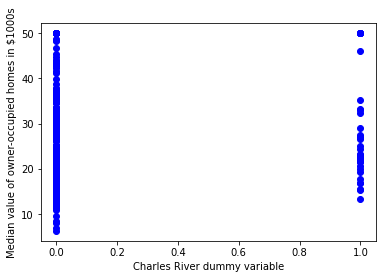

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.CHAS, df.MEDV, color = 'blue')
plt.xlabel("Charles River dummy variable")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[-12.87337117]]
Intercept:  [22.80367743]


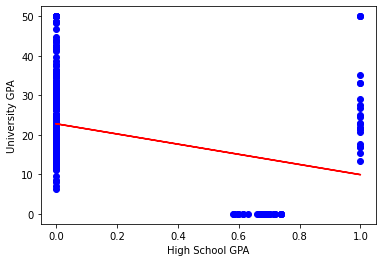

Mean absolute error: 8.73
Residual Sum of Squares: 142.013479
R2-score: -5.44


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['CHAS']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['CHAS']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

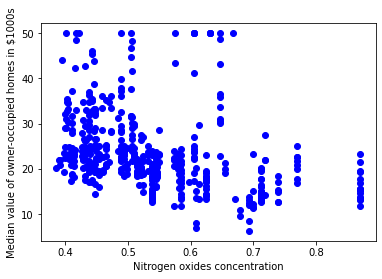

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.NOX, df.MEDV, color = 'blue')
plt.xlabel("Nitrogen oxides concentration")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[-4.5053371]]
Intercept:  [26.02238071]


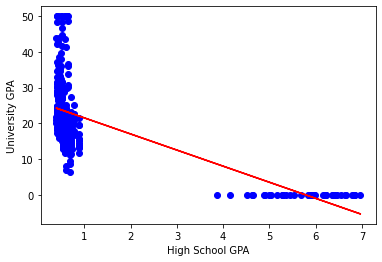

Mean absolute error: 6.01
Residual Sum of Squares: 68.316709
R2-score: -0.03


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['NOX']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['NOX']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

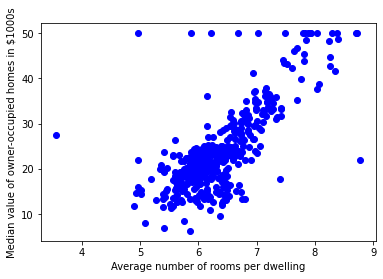

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.RM, df.MEDV, color = 'blue')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

Coefficient:  [[-0.25875558]]
Intercept:  [25.14919024]


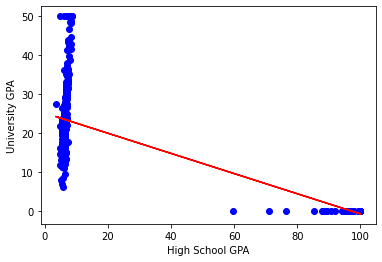

Mean absolute error: 6.11
Residual Sum of Squares: 71.810394
R2-score: -0.31


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x__= X_train[['RM']].values.reshape(-1, 1)
train_y__= y_train[['MEDV']].values.reshape(-1, 1)
test_x__ = X_test[['RM']].values.reshape(-1, 1)
test_y__= y_test[['MEDV']].values.reshape(-1, 1)
regr.fit(train_x__, train_y__)
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)
plt.scatter(train_x__, train_y__, color = 'blue')
plt.plot(train_x__, regr.coef_*train_x__+regr.intercept_, color = 'red')
plt.xlabel("High School GPA")
plt.ylabel("University GPA")
plt.show()
from sklearn.metrics import r2_score
y_test_pred = regr.predict(test_x__)
print("Mean absolute error: %.2f"% np.mean(np.absolute(y_test_pred - test_y__)))
print("Residual Sum of Squares: %2f" % np.mean((y_test_pred - test_y__) ** 2))
print("R2-score: %.2f"% r2_score(y_test_pred, test_y__))

Checking for NaN and infinite values.

Mean Absolte Error is least for RAD (MAE = 5.76). So, it is more likely to give precise value for MEDV.

Finding Multi-Linear regression for {RM, DIS} vs {MEDV}

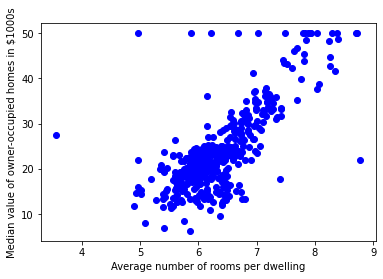

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.RM, df.MEDV, color = 'blue')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

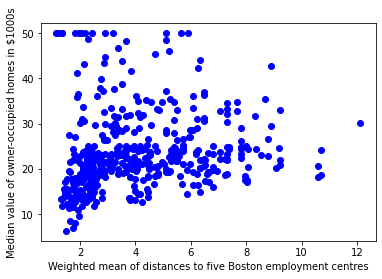

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.DIS, df.MEDV, color = 'blue')
plt.xlabel("Weighted mean of distances to five Boston employment centres")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = X_train[['DIS', 'RM']]
y = y_train[['MEDV']]

regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.27165587 -0.31966022]]
Intercept:  [24.43785603]


In [ ]:
from sklearn.metrics import r2_score
y_hat= regr.predict(X_test[['DIS', 'RM']])
x = X_test[['DIS', 'RM']]
y = y_test[['MEDV']]

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )

Variance score: 0.46
Mean absolute error: 6.12
Residual sum of squares (MSE): 72.38
R2-score: -0.32


Finding Multi-Linear regression for {NOX, INDUS} vs {MEDV}

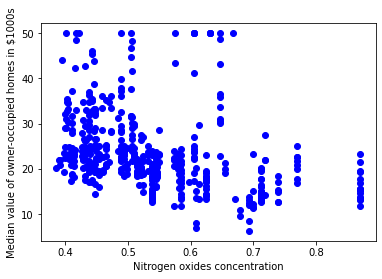

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.NOX, df.MEDV, color = 'blue')
plt.xlabel("Nitrogen oxides concentration")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

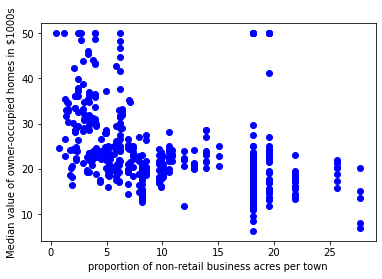

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.INDUS, df.MEDV, color = 'blue')
plt.xlabel("proportion of non-retail business acres per town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = X_train[['NOX', 'INDUS']]
y = y_train[['MEDV']]

regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-5.31405166 -0.46649379]]
Intercept:  [31.2529825]


In [ ]:
from sklearn.metrics import r2_score
y_hat= regr.predict(X_test[['NOX', 'INDUS']])
x = X_test[['NOX', 'INDUS']]
y = y_test[['MEDV']]

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )

Variance score: 0.53
Mean absolute error: 5.47
Residual sum of squares (MSE): 63.17
R2-score: 0.16


Finding Multi-Linear regression for {DIS, AGE} vs {MEDV}

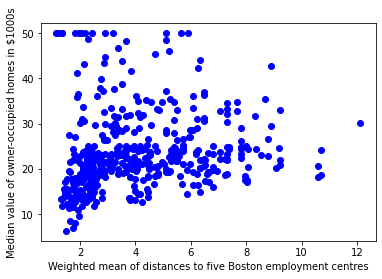

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.DIS, df.MEDV, color = 'blue')
plt.xlabel("Weighted mean of distances to five Boston employment centres")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

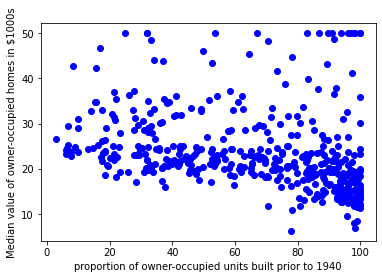

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.AGE, df.MEDV, color = 'blue')
plt.xlabel("proportion of owner-occupied units built prior to 1940")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = X_train[['AGE', 'DIS']]
y = y_train[['MEDV']]

regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.17698419 -1.68250164]]
Intercept:  [41.90582311]


In [ ]:
from sklearn.metrics import r2_score
y_hat= regr.predict(X_test[['AGE', 'DIS']])
x = X_test[['AGE', 'DIS']]
y = y_test[['MEDV']]

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )

Variance score: 0.53
Mean absolute error: 5.42
Residual sum of squares (MSE): 62.72
R2-score: 0.07


Finding Multi-Linear regression for {B, CRIM} vs {MEDV}

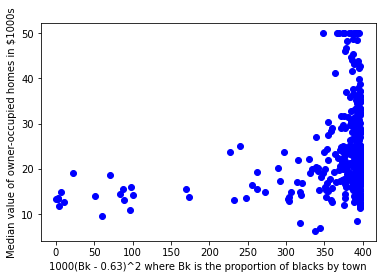

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.B, df.MEDV, color = 'blue')
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

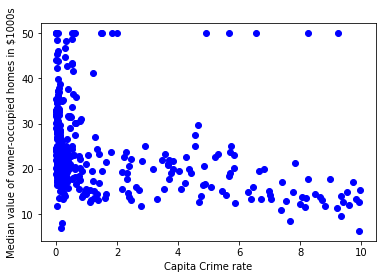

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.CRIM, df.MEDV, color = 'blue')
plt.xlabel("Capita Crime rate")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = X_train[['B', 'CRIM']]
y = y_train[['MEDV']]

regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.05778016 -0.25025904]]
Intercept:  [2.16182204]


In [ ]:
from sklearn.metrics import r2_score
y_hat= regr.predict(X_test[['B', 'CRIM']])
x = X_test[['B', 'CRIM']]
y = y_test[['MEDV']]

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )

Variance score: 0.50
Mean absolute error: 5.95
Residual sum of squares (MSE): 67.10
R2-score: -0.19


Finding Multi-Linear regression for {TAX, RAD, INDUS, NOX} vs {MEDV}

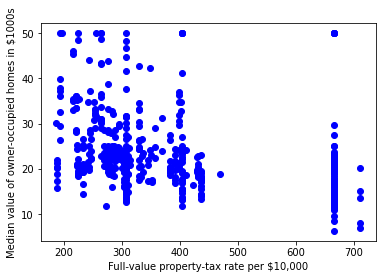

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.TAX, df.MEDV, color = 'blue')
plt.xlabel("Full-value property-tax rate per $10,000")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

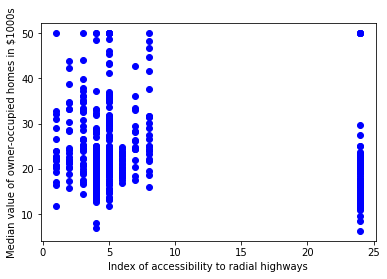

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.RAD, df.MEDV, color = 'blue')
plt.xlabel("Index of accessibility to radial highways")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

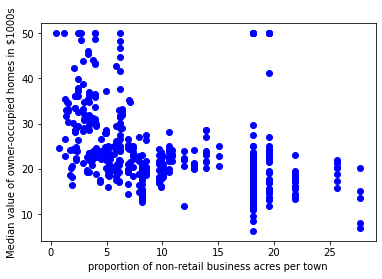

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.INDUS, df.MEDV, color = 'blue')
plt.xlabel("proportion of non-retail business acres per town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

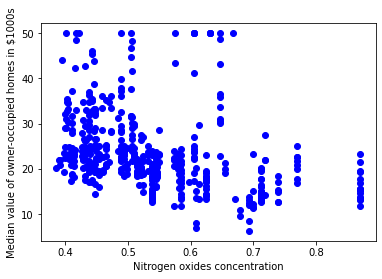

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.NOX, df.MEDV, color = 'blue')
plt.xlabel("Nitrogen oxides concentration")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = X_train[['TAX', 'RAD', 'INDUS', 'NOX']]
y = y_train[['MEDV']]

regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.00704145 -0.04063178 -0.40849157 -0.67961609]]
Intercept:  [31.1887407]


In [ ]:
from sklearn.metrics import r2_score
y_hat= regr.predict(X_test[['TAX', 'RAD', 'INDUS', 'NOX']])
x = X_test[['TAX', 'RAD', 'INDUS', 'NOX']]
y = y_test[['MEDV']]

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )

Variance score: 0.54
Mean absolute error: 5.14
Residual sum of squares (MSE): 61.91
R2-score: 0.17


Finding Multi-Linear regression for {RM, ZN, DIS, B} vs {MEDV}

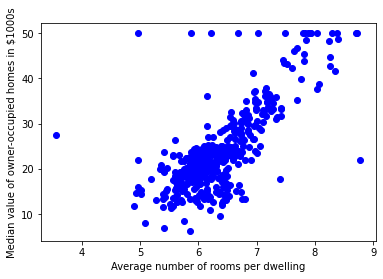

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.RM, df.MEDV, color = 'blue')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

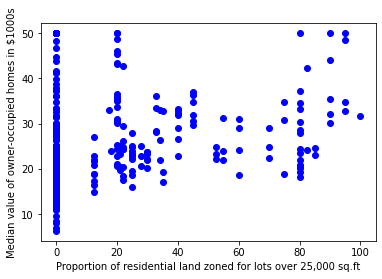

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.ZN, df.MEDV, color = 'blue')
plt.xlabel("Proportion of residential land zoned for lots over 25,000 sq.ft")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

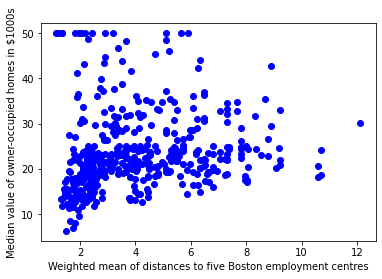

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.DIS, df.MEDV, color = 'blue')
plt.xlabel("Weighted mean of distances to five Boston employment centres")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

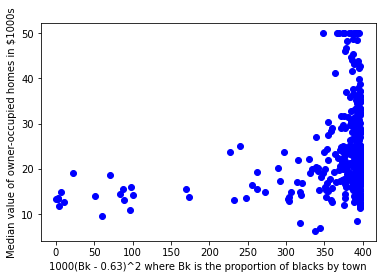

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.B, df.MEDV, color = 'blue')
plt.xlabel("1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = X_train[['RM', 'ZN', 'DIS', 'B']]
y = y_train[['MEDV']]

regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 0.09197087  0.16693083 -1.02013481  0.03451208]]
Intercept:  [12.22732328]


In [ ]:
from sklearn.metrics import r2_score
y_hat= regr.predict(X_test[['RM', 'ZN', 'DIS', 'B']])
x = X_test[['RM', 'ZN', 'DIS', 'B']]
y = y_test[['MEDV']]

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )

Variance score: 0.59
Mean absolute error: 4.84
Residual sum of squares (MSE): 55.68
R2-score: 0.29


Finding Multi-Linear regression for {LSTAT, PTRATIO, AGE, CRIM, INDUS, NOX, CHAS} vs {MEDV}

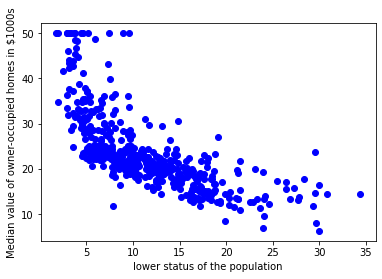

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.LSTAT, df.MEDV, color = 'blue')
plt.xlabel("lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

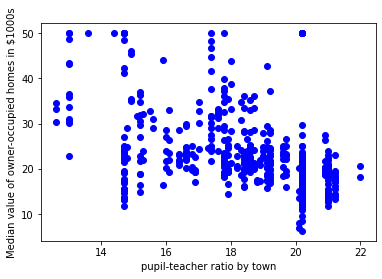

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.PTRATIO, df.MEDV, color = 'blue')
plt.xlabel("pupil-teacher ratio by town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

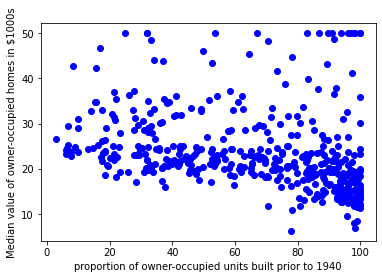

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.AGE, df.MEDV, color = 'blue')
plt.xlabel("proportion of owner-occupied units built prior to 1940")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

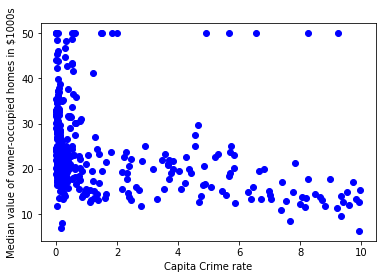

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.CRIM, df.MEDV, color = 'blue')
plt.xlabel("Capita Crime rate")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

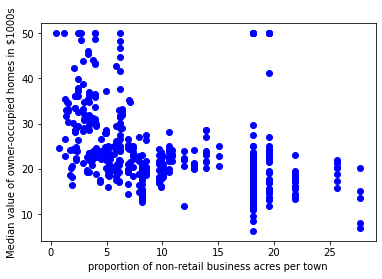

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.INDUS, df.MEDV, color = 'blue')
plt.xlabel("proportion of non-retail business acres per town")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

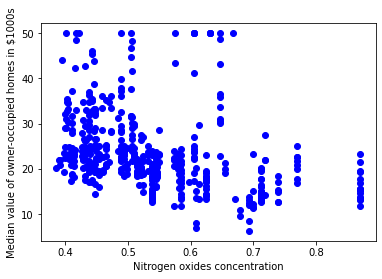

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.NOX, df.MEDV, color = 'blue')
plt.xlabel("Nitrogen oxides concentration")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

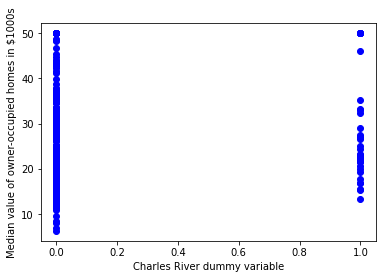

In [ ]:
import matplotlib.pyplot as plt
plt.scatter( df.CHAS, df.MEDV, color = 'blue')
plt.xlabel("Charles River dummy variable")
plt.ylabel("Median value of owner-occupied homes in $1000s")
plt.show()

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = X_train[['LSTAT', 'PTRATIO', 'AGE', 'CRIM', 'INDUS', 'NOX', 'CHAS']]
y = y_train[['MEDV']]

regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.98877258 -0.01270291  0.05864075  0.00969069 -0.11819415 -3.67629849
   2.58904764]]
Intercept:  [34.40496606]


In [ ]:
from sklearn.metrics import r2_score
y_hat= regr.predict(X_test[['LSTAT', 'PTRATIO', 'AGE', 'CRIM', 'INDUS', 'NOX', 'CHAS']])
x = X_test[['LSTAT', 'PTRATIO', 'AGE', 'CRIM', 'INDUS', 'NOX', 'CHAS']]
y = y_test[['MEDV']]

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y_hat , y) )

Variance score: 0.71
Mean absolute error: 4.85
Residual sum of squares (MSE): 38.35
R2-score: 0.68


This set .i.e, {LSTAT, PTRATIO, AGE, CRIM, INDUS, NOX, CHAS} vs {MEDV} has the largest R2-score among the sets I have considered here. So, these features together have higher weightage.